# Chapter 6

## More GLM

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sfm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/data4a.csv')
data['d'] = pd.get_dummies(data['f'])['T']

In [3]:
# Data shows that y is 0 ~ 8 and N is always 8
data.describe()

,N,y,x,d
count,100.0,100.000000,100.000000,100.000000
mean,8.0,5.080000,9.967200,0.500000
std,0.0,2.743882,1.088954,0.502519
min,8.0,0.000000,7.660000,0.000000
25%,8.0,3.000000,9.337500,0.000000
50%,8.0,6.000000,9.965000,0.500000
75%,8.0,8.000000,10.770000,1.000000
max,8.0,8.000000,12.440000,1.000000


## Logistic Regression

logistic function  
$ logistic(z_i) = \frac{1}{1+e^{-z_i}} = q_i $

$ \log \frac{q_i}{1-q_i} = z_i $

logit link function  
$ logit(q_i) = \log \frac{q_i}{1-q_i} $

In [4]:
fit = sfm.glm(formula='y + I(N - y) ~ x + d', 
              data=data, 
              family=sm.families.Binomial()).fit()

In [5]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Thu, 30 May 2019   Deviance:                       123.03
Time:                        13:00:07   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
x              1.9524      0.139     14.059      0.000       1.680       2.225
d              2.0215      0.231      8.740      0.000       1.568       2.475
==============================================================================
"""

In [6]:
preds = fit.predict(data)
preds*=8

(array([ 9.,  9.,  3.,  9.,  4., 13., 14., 39.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Patch objects>)

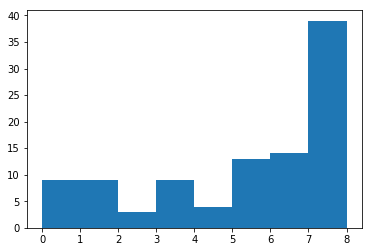

In [7]:
plt.hist(data.y, 8)

(array([10.,  9.,  8.,  8.,  5., 12., 16., 32.]),
 array([0.13138164, 1.11381641, 2.09625119, 3.07868596, 4.06112074,
        5.04355551, 6.02599028, 7.00842506, 7.99085983]),
 <a list of 8 Patch objects>)

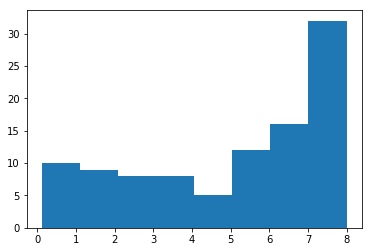

In [8]:
plt.hist(preds, 8)

## (Deprecated) Interaction term

In [9]:
fit_inte = sfm.glm(formula='y + I(N - y) ~ x + d + x:d', 
              data=data, 
              family=sm.families.Binomial()).fit()

In [10]:
fit_inte.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Thu, 30 May 2019   Deviance:                       122.43
Time:                        13:00:08   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000     -22.220     -14.827
x              1.8525      0.186      9.983      0.000       1.489       2.216
d             -0.0638      2.704     -0.024      0.981      -5.363       5.235
x:d            0.2163      0.280      0.772      0.440      -0.333       0.765
==============================================================================
"""

In [11]:
preds_inte = fit_inte.predict()
preds_inte *= 8

(array([ 9.,  3., 13.,  4.,  6.,  4.,  8.,  9., 16., 28.]),
 array([0.16346139, 0.94648745, 1.72951352, 2.51253958, 3.29556564,
        4.07859171, 4.86161777, 5.64464383, 6.4276699 , 7.21069596,
        7.99372202]),
 <a list of 10 Patch objects>)

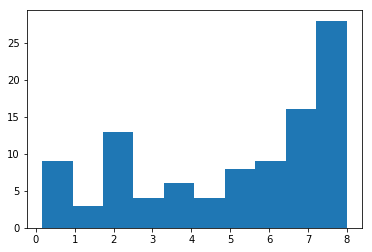

In [12]:
plt.hist(preds_inte, 8)

(array([ 9.,  9.,  3.,  9.,  4., 13., 14., 39.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Patch objects>)

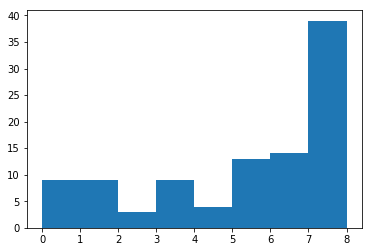

In [13]:
plt.hist(data.y, 8)

## Offset term

In [18]:
data = pd.read_csv('../input/data4b.csv')
data.describe()

,y,x,A
count,100.000000,100.000000,100.000000
mean,48.090000,0.514100,10.468000
std,17.137056,0.188573,2.927262
min,13.000000,0.050000,3.500000
25%,36.000000,0.400000,8.800000
50%,46.000000,0.515000,10.300000
75%,59.500000,0.642500,12.150000
max,95.000000,0.990000,17.400000


In [19]:
fit_offset = sfm.glm(formula='y ~ x',
                     offset=np.log(data.A),
                     data=data,
                     family=sm.families.Poisson()).fit()

In [20]:
fit_offset.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Thu, 30 May 2019   Deviance:                       81.608
Time:                        13:07:21   Pearson chi2:                     81.5
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000       0.885       1.061
x              1.0383      0.078     13.364      0.000       0.886       1.191
==============================================================================
"""

In [31]:
preds_offset = fit.predict()

In [32]:
preds_offset

array([0.38211526, 0.71609089, 0.83320236, 0.86095683, 0.2240849 ,
       0.08823604, 0.26742445, 0.87862277, 0.01842614, 0.95321277,
       0.25610706, 0.25984439, 0.07374022, 0.69168498, 0.52626138,
       0.87439655, 0.4726218 , 0.27905435, 0.6214303 , 0.92987028,
       0.38673544, 0.75766452, 0.21736878, 0.49699951, 0.28299916,
       0.98218878, 0.34597656, 0.92858635, 0.71609089, 0.67048694,
       0.92987028, 0.24151383, 0.78845444, 0.0164227 , 0.23094729,
       0.96118904, 0.78186809, 0.91601986, 0.75042299, 0.69168498,
       0.96661395, 0.98076986, 0.95321277, 0.05817197, 0.89057196,
       0.72004342, 0.8979538 , 0.12090025, 0.53598527, 0.82490261,
       0.09733276, 0.45581763, 0.81785438, 0.87766001, 0.26949184,
       0.12202357, 0.82920085, 0.99691357, 0.53374696, 0.90744588,
       0.98168291, 0.45581763, 0.79975014, 0.83466024, 0.97049746,
       0.83733703, 0.23632779, 0.689763  , 0.07446248, 0.92118496,
       0.84258573, 0.07181569, 0.66849615, 0.18170655, 0.75238

(array([ 8.,  4., 12.,  4.,  7.,  4.,  8., 10., 15., 28.]),
 array([0.0164227 , 0.11466618, 0.21290966, 0.31115314, 0.40939661,
        0.50764009, 0.60588357, 0.70412705, 0.80237052, 0.900614  ,
        0.99885748]),
 <a list of 10 Patch objects>)

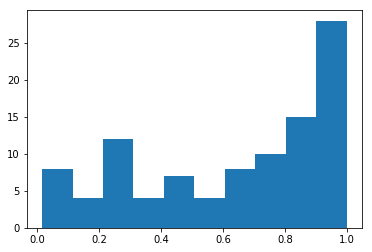

In [33]:
plt.hist(preds_offset, 10)

(array([ 4.,  9., 15., 20., 18., 13., 13.,  3.,  1.,  4.]),
 array([13. , 21.2, 29.4, 37.6, 45.8, 54. , 62.2, 70.4, 78.6, 86.8, 95. ]),
 <a list of 10 Patch objects>)

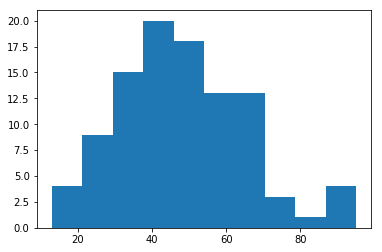

In [30]:
plt.hist(data.y, 10)

## Using Gaussian Distribution

## Using Gamma Distribution